In [2]:
import pydicom as dicom
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

import tensorflow as tf
tf.get_logger().setLevel('INFO')

2023-12-13 20:57:30.678216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import os 
from os import walk

In [4]:
# get all cn conversion image files in subdirectories
cn_path = '/Users/adelinechin/207/CN Conversion'

# list to store files name
cn_list = []
for (cn_path, dir_names, file_names) in walk(cn_path):
    for file in file_names:
        if file.endswith('.dcm'):
            cn_list.append(os.path.join(cn_path, file))
print(cn_list)

['/Users/adelinechin/207/CN Conversion/005_S_0223/Axial_PD_T2_FSE/2006-02-28_09_49_01.0/I11647/ADNI_005_S_0223_MR_Axial_PD_T2_FSE__br_raw_20060306140135269_84_S11980_I11647.dcm', '/Users/adelinechin/207/CN Conversion/005_S_0223/Axial_PD_T2_FSE/2006-02-28_09_49_01.0/I11647/ADNI_005_S_0223_MR_Axial_PD_T2_FSE__br_raw_20060306140131832_20_S11980_I11647.dcm', '/Users/adelinechin/207/CN Conversion/005_S_0223/Axial_PD_T2_FSE/2006-02-28_09_49_01.0/I11647/ADNI_005_S_0223_MR_Axial_PD_T2_FSE__br_raw_20060306140131175_4_S11980_I11647.dcm', '/Users/adelinechin/207/CN Conversion/005_S_0223/Axial_PD_T2_FSE/2006-02-28_09_49_01.0/I11647/ADNI_005_S_0223_MR_Axial_PD_T2_FSE__br_raw_20060306140126769_18_S11980_I11647.dcm', '/Users/adelinechin/207/CN Conversion/005_S_0223/Axial_PD_T2_FSE/2006-02-28_09_49_01.0/I11647/ADNI_005_S_0223_MR_Axial_PD_T2_FSE__br_raw_20060306140138660_54_S11980_I11647.dcm', '/Users/adelinechin/207/CN Conversion/005_S_0223/Axial_PD_T2_FSE/2006-02-28_09_49_01.0/I11647/ADNI_005_S_0223_

In [5]:
# choose scans from the middle of the brain
image_id = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
cn_images = []
for file_name in cn_list:
    if file_name[len(file_name)-20:len(file_name)-18] in image_id:
        cn_images.append(file_name)

In [6]:
# get all mci conversion image files in subdirectories
mci_path = '/Users/adelinechin/207/MCI Conversion'

# list to store files name
mci_list = []
for (mci_path, dir_names, file_names) in walk(mci_path):
    for file in file_names:
        if file.endswith('.dcm'):
            mci_list.append(os.path.join(mci_path, file))
print(mci_list)

['/Users/adelinechin/207/MCI Conversion/128_S_0258/Axial_PD-T2_TSE/2006-10-20_16_44_26.0/I27375/ADNI_128_S_0258_MR_Axial_PD-T2_TSE__br_raw_20061024215350654_37_S20930_I27375.dcm', '/Users/adelinechin/207/MCI Conversion/128_S_0258/Axial_PD-T2_TSE/2006-10-20_16_44_26.0/I27375/ADNI_128_S_0258_MR_Axial_PD-T2_TSE__br_raw_20061024215334169_13_S20930_I27375.dcm', '/Users/adelinechin/207/MCI Conversion/128_S_0258/Axial_PD-T2_TSE/2006-10-20_16_44_26.0/I27375/ADNI_128_S_0258_MR_Axial_PD-T2_TSE__br_raw_20061024215349341_35_S20930_I27375.dcm', '/Users/adelinechin/207/MCI Conversion/128_S_0258/Axial_PD-T2_TSE/2006-10-20_16_44_26.0/I27375/ADNI_128_S_0258_MR_Axial_PD-T2_TSE__br_raw_20061024215335560_15_S20930_I27375.dcm', '/Users/adelinechin/207/MCI Conversion/128_S_0258/Axial_PD-T2_TSE/2006-10-20_16_44_26.0/I27375/ADNI_128_S_0258_MR_Axial_PD-T2_TSE__br_raw_20061024215347950_33_S20930_I27375.dcm', '/Users/adelinechin/207/MCI Conversion/128_S_0258/Axial_PD-T2_TSE/2006-10-20_16_44_26.0/I27375/ADNI_128_

In [7]:
# choose scans from the middle of the brain
mci_images = []
for file_name in mci_list:
    if file_name[len(file_name)-20:len(file_name)-18] in image_id:
        mci_images.append(file_name)

In [8]:
# get no conversion
no_conv_path = '/Users/adelinechin/207/No Conversion'

# list to store files name
no_conv_list = []
for (no_conv_path, dir_names, file_names) in walk(no_conv_path):
    for file in file_names:
        if file.endswith('.dcm'):
            no_conv_list.append(os.path.join(no_conv_path, file))
print(no_conv_list)

['/Users/adelinechin/207/No Conversion/011_S_0326/Axial_PD-T2_TSE/2006-03-20_14_07_50.0/I12222/ADNI_011_S_0326_MR_Axial_PD-T2_TSE__br_raw_20060321152113662_21_S12341_I12222.dcm', '/Users/adelinechin/207/No Conversion/011_S_0326/Axial_PD-T2_TSE/2006-03-20_14_07_50.0/I12222/ADNI_011_S_0326_MR_Axial_PD-T2_TSE__br_raw_20060321152114209_23_S12341_I12222.dcm', '/Users/adelinechin/207/No Conversion/011_S_0326/Axial_PD-T2_TSE/2006-03-20_14_07_50.0/I12222/ADNI_011_S_0326_MR_Axial_PD-T2_TSE__br_raw_20060321152120037_41_S12341_I12222.dcm', '/Users/adelinechin/207/No Conversion/011_S_0326/Axial_PD-T2_TSE/2006-03-20_14_07_50.0/I12222/ADNI_011_S_0326_MR_Axial_PD-T2_TSE__br_raw_20060321152118943_38_S12341_I12222.dcm', '/Users/adelinechin/207/No Conversion/011_S_0326/Axial_PD-T2_TSE/2006-03-20_14_07_50.0/I12222/ADNI_011_S_0326_MR_Axial_PD-T2_TSE__br_raw_20060321152122787_5_S12341_I12222.dcm', '/Users/adelinechin/207/No Conversion/011_S_0326/Axial_PD-T2_TSE/2006-03-20_14_07_50.0/I12222/ADNI_011_S_0326_

In [9]:
# choose scans from the middle of the brain
image_id = ['25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
no_conv_images = []
for file_name in no_conv_list:
    if file_name[len(file_name)-20:len(file_name)-18] in image_id:
        no_conv_images.append(file_name)

In [10]:
# generate labels
no_conv_labels = [0]*len(no_conv_images)
cn_labels = [1]*len(cn_images)
mci_labels = [2]*len(mci_images)

In [11]:
# sanity check label lists
len(cn_labels) == len(cn_images) and len(mci_labels) == len(mci_images) and len(no_conv_labels) == len(no_conv_images)

True

In [12]:
# combine conv and no conv data 

labels = []
for label in cn_labels:
    labels.append(label)
for label in mci_labels:
    labels.append(label)
for label in no_conv_labels:
    labels.append(label)

scans = []
for scan in cn_images:
    scans.append(scan)
for scan in mci_images:
    scans.append(scan)
for scan in no_conv_images:
    scans.append(scan)

In [13]:
# sanity check data
len(labels) == len(scans)

True

In [14]:
# read and convert image paths to pixel arrays
images = []
for path in scans:
    ds = dicom.dcmread(path, force=True)
    try:
        # Dicom to pixel array
        pixel_array = ds.pixel_array.astype(float)
        
    except AttributeError:
        continue
    images.append(pixel_array)

In [15]:
# sanity check
len(images) == len(scans)

True

In [16]:
labels = np.array(labels)

In [17]:
# list to ndarray
for i, image in enumerate(images):
    images[i] = np.resize(image, (224, 224))
    images[i] = np.dstack([images[i], images[i], images[i]])

In [18]:
images = np.stack(images)

In [19]:
images.shape

(2035, 224, 224, 3)

In [20]:
labels.shape

(2035,)

### Split into train/validation/test data and apply transformations and augmentations

In [21]:
IMAGE_SIZE = (224, 224)
CONTRAST_FACTOR = 1
DELTA = 0.3

def preprocess(images, y, split=(0.6,0.2,0.2)):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(images.shape[0]))
    images, y = images[shuffle], y[shuffle]

    splits = np.multiply(len(images), split).astype(int)
    X_train, X_val, X_test = np.split(images, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(y, [splits[0], splits[0]+splits[1]])

    # image transformation on training, validation, and test data 
    X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
    X_val = tf.image.resize(X_val, size=IMAGE_SIZE)
    X_test = tf.image.resize(X_test, size=IMAGE_SIZE)

    X_train = X_train/255.0
    X_val = X_val/255.0
    X_test = X_test/255.0

    # image augmentation on training data 
    X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)

    # concatenate original X_train and augmented X_train data
    X_train = tf.concat([X_train, X_train_augm],axis=0)

    # concatenate y_train 
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)

    # shuffle X_train and y_train
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy() 

    return X_train, y_train, X_val, y_val, X_test, y_test

In [22]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocess(images, labels, split=(0.6,0.2,0.2))

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (2442, 224, 224, 3)
y_train shape (2442,)
X_val shape (407, 224, 224, 3)
y_val shape (407,)
X_test shape (407, 224, 224, 3)
y_test shape (407,)


In [23]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1456]
 [   1  164]
 [   2  822]]


### Build model

In [24]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    name='pool_1'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='same',
    name='conv_2',
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2')
)

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=1024,
    name='fc_1',
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))

model.add(tf.keras.layers.Dense(
    units=3,
    name='fc_2',
    activation='softmax'))

tf.random.set_seed(1)
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 pool_1 (MaxPooling2D)       (None, 112, 112, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv_2 (Conv2D)             (None, 112, 112, 64)      51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 56, 56, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                        

### Compile model

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit model

In [27]:
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val)
)

Epoch 1/10
77/77 [==============================] - 199s 3s/step - loss: 0.7106 - accuracy: 0.6777 - val_loss: 1.5294 - val_accuracy: 0.6560
Epoch 2/10
77/77 [==============================] - 193s 3s/step - loss: 0.6690 - accuracy: 0.7011 - val_loss: 1.2921 - val_accuracy: 0.6609
Epoch 3/10
77/77 [==============================] - 195s 3s/step - loss: 0.6358 - accuracy: 0.7273 - val_loss: 0.8098 - val_accuracy: 0.8084
Epoch 4/10
77/77 [==============================] - 195s 3s/step - loss: 0.5984 - accuracy: 0.7318 - val_loss: 0.7224 - val_accuracy: 0.7862
Epoch 5/10
77/77 [==============================] - 205s 3s/step - loss: 0.5836 - accuracy: 0.7527 - val_loss: 0.6362 - val_accuracy: 0.7764
Epoch 6/10
77/77 [==============================] - 200s 3s/step - loss: 0.4954 - accuracy: 0.7772 - val_loss: 0.6236 - val_accuracy: 0.7494
Epoch 7/10
77/77 [==============================] - 207s 3s/step - loss: 0.4822 - accuracy: 0.7875 - val_loss: 0.4143 - val_accuracy: 0.8771
Epoch 8/10
77

### Evaluation

In [ ]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

13/13 [==============================] - 8s 611ms/step - loss: 0.4434 - accuracy: 0.8428

Test Acc. 84.28%


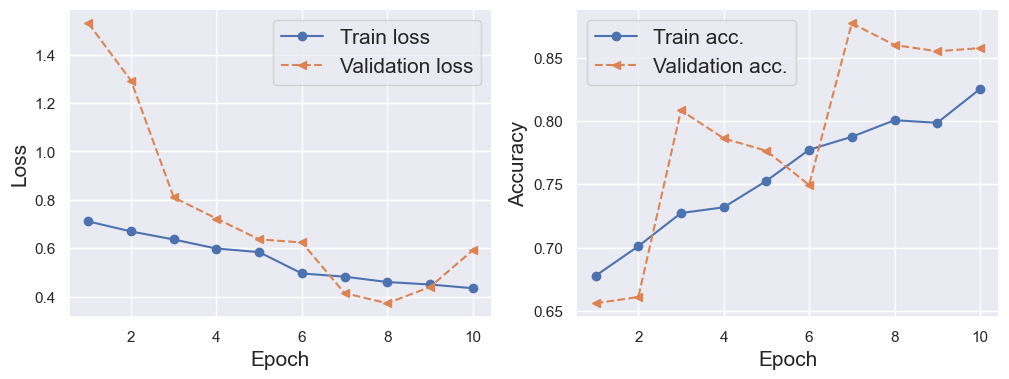

In [28]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [30]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)

13/13 [==============================] - 8s 591ms/step


In [31]:
predictions = []
for pred in y_pred:
    predictions.append(np.argmax(pred))

In [206]:
f1_score(y_test, predictions, average='macro')

0.7527983853809586

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       249
           1       1.00      0.71      0.83        24
           2       0.89      0.78      0.83       134

    accuracy                           0.88       407
   macro avg       0.92      0.81      0.86       407
weighted avg       0.88      0.88      0.88       407



In [33]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.76062623692046

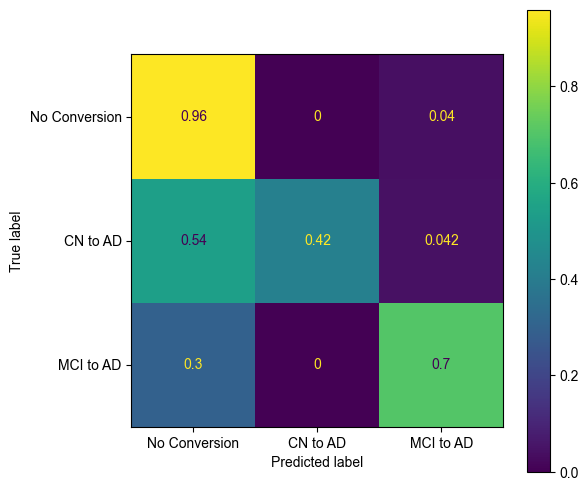

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
display_labels = ['No Conversion', 'CN to AD', 'MCI to AD']

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, predictions, normalize='true'), 
    display_labels=display_labels)

with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=[6,6])
    disp.plot(include_values=True, xticks_rotation='horizontal', ax=ax);